In [2]:
%%capture
!pip install pandas numpy matplotlib scikit-learn seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
file_path = "../etc/synthetic_wildfire_data.csv"
df = pd.read_csv(file_path)

df = pd.get_dummies(df, columns=["lc_name", "eco_name"], drop_first=True)

features = ["event_day", "tot_ar_km2", "mx_grw_km2", "mn_grw_km2", "mu_grw_km2",
            "tot_perim", "temperature", "humidity", "wind_speed",
            "lc_name_Grassland", "lc_name_Shrubland", "eco_name_Temperate", "eco_name_Tropical"]

target = "fsr_km2_dy"

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 0.46
Root Mean Squared Error (RMSE): 0.50


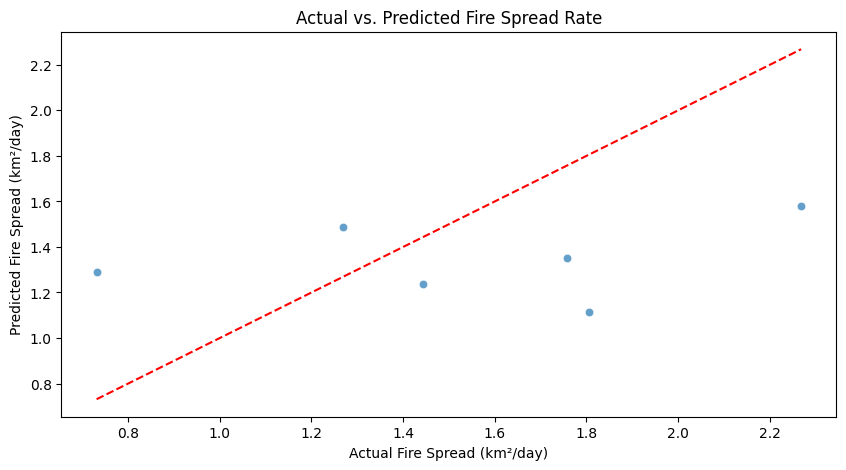

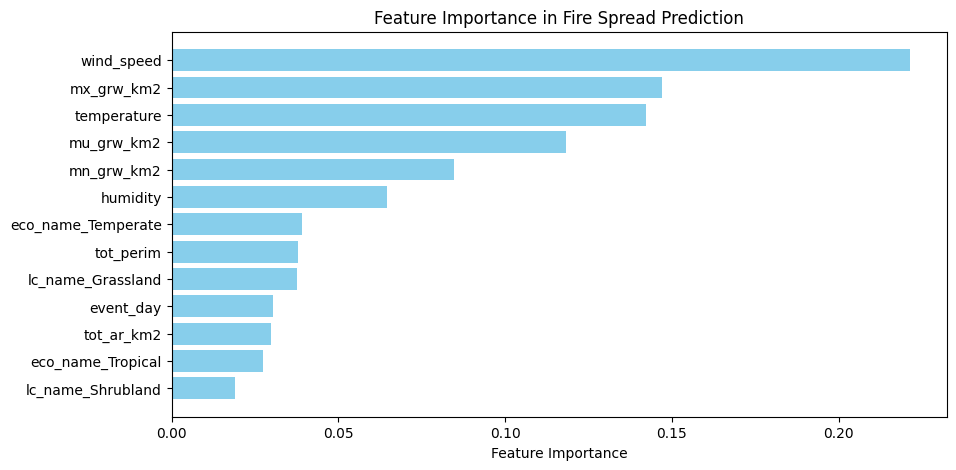

In [7]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Ideal line
plt.xlabel("Actual Fire Spread (km²/day)")
plt.ylabel("Predicted Fire Spread (km²/day)")
plt.title("Actual vs. Predicted Fire Spread Rate")
plt.show()

importances = model.feature_importances_
feature_names = features
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx], color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Fire Spread Prediction")
plt.show()

# Random fire simulation
Will use real-data if nice




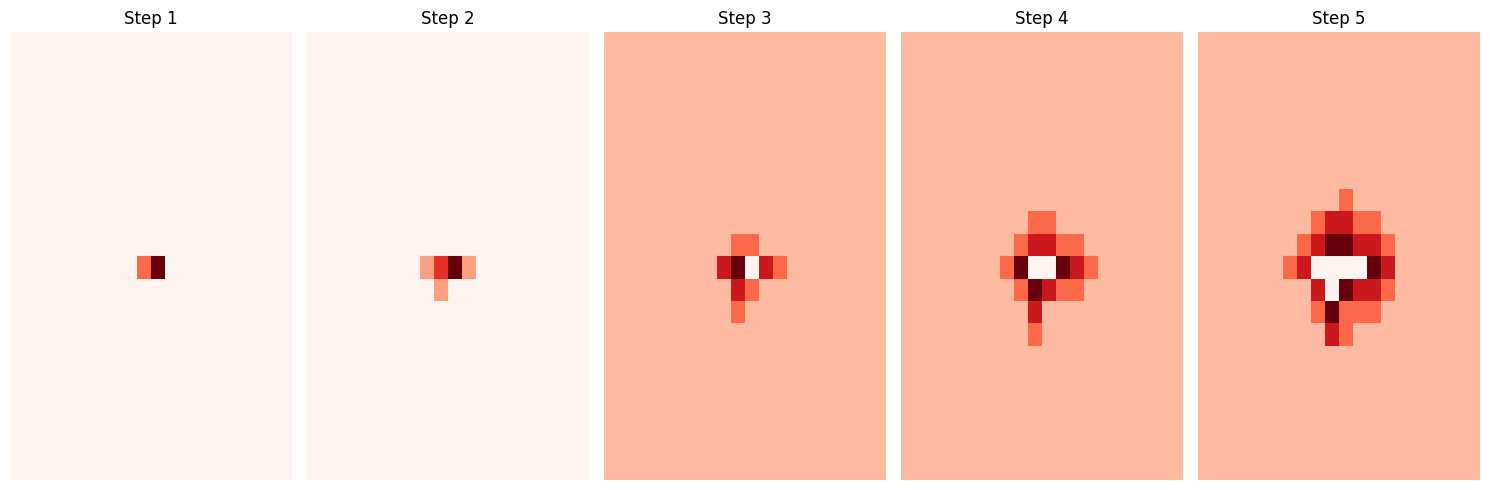

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

GRID_SIZE = 20
SPREAD_PROB = 0.4
BURN_DURATION = 3

fire_grid = np.zeros((GRID_SIZE, GRID_SIZE))

elevation = np.random.rand(GRID_SIZE, GRID_SIZE) * 100

fire_grid[10, 10] = 1

def spread_fire(grid):
    new_grid = grid.copy()

    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if grid[x, y] > 0:
                new_grid[x, y] += 1
                if new_grid[x, y] > BURN_DURATION:
                    new_grid[x, y] = -1

                for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE and new_grid[nx, ny] == 0:
                        spread_chance = SPREAD_PROB + (elevation[nx, ny] / 100) * 0.2
                        if np.random.rand() < spread_chance:
                            new_grid[nx, ny] = 1

    return new_grid

timesteps = 5
fig, axes = plt.subplots(1, timesteps, figsize=(15, 5))

for t in range(timesteps):
    fire_grid = spread_fire(fire_grid)
    sns.heatmap(fire_grid, cmap="Reds", cbar=False, ax=axes[t])
    axes[t].set_title(f"Step {t+1}")
    axes[t].axis("off")

plt.tight_layout()
plt.show()
